In [ ]:
## 0. load packages
import os, sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from datetime import datetime

os.chdir('/h/u145/liuxinrui/CROP/')
sys.path.insert(0, '/h/u145/liuxinrui/CROP/')

In [ ]:
## 1. load parameters

from core_fct.fct_loadP_CROP import load_ISIMIP3b_param
Par = load_ISIMIP3b_param()
Par['N_bnf'] = Par['N_bnf'].sel(mod_bnf_soy='Ma_2022', drop=True)
print(Par)

loading primary parameters
>>>  Running split_region  for Southern Asia <<<
>>>  Running split_region  for South-eastern Asia <<<
>>>  Running split_region  for Africa <<<
>>>  Running split_region  for Northern America <<<
>>>  Running split_region  for USA <<<
>>>  Running split_region  for CAN <<<
>>>  Running split_region  for Latin America and the Caribbean <<<
>>>  Running split_region  for BRA <<<
>>>  Running split_region  for Eastern Asia <<<
>>>  Running split_region  for CHN <<<
>>>  Running split_region  for Central Asia <<<
>>>  Running split_region  for Western Asia <<<
>>>  Running split_region  for Europe <<<
>>>  Running split_region  for RUS <<<
>>>  Running split_region  for Oceania <<<
>>>  Running split_region  for AUS <<<
<xarray.Dataset>
Dimensions:        (reg_land: 292, mod_clim_gcm: 5, spc_crop: 6, irr: 2,
                    mod_YD_crop: 8, mod_bnf_soy: 2)
Coordinates:
  * reg_land       (reg_land) int64 1 2 3 4 5 6 7 ... 287 288 289 290 291 292
    reg_land_

In [ ]:
## 2. load drivers
from core_fct.fct_loadD_CROP import load_Nfertl_scen, load_Ndep_scen
soc = '2015soc'
For_Nfertl = load_Nfertl_scen(datasets=['ISIMIP3b']).sel(scen_N_fertl='ISIMIP3b-'+soc, drop=True)
print(For_Nfertl)

For_Ndep = load_Ndep_scen(datasets=['ISIMIP3b']).sel(scen_N_dep='ISIMIP3b-'+soc, drop=True)
print(For_Ndep)

For_clim = xr.load_dataset('./input_data/observations/crop/land-climate_ISIMIP3a.nc')
For_co2 = xr.load_dataset('./input_data/observations/crop/concentrations_ISIMIP3b.nc').sel(scen='historical', drop=True)

## set run options
ind0, ind1 = 1901, 2014
For = xr.merge([For_clim, For_co2, For_Nfertl, For_Ndep]).sel(year=slice(ind0, ind1))

## format drivers
## Initial CO2 here is 399.95 ppm
For['D_CO2'] = For.CO2 - Par['CO2_0']
For['D_Tl'] = For.Tl - For.Tl.sel(year=slice(1901, 1930)).mean('year')
For['D_Pl'] = For.Pl - For.Pl.sel(year=slice(1901, 1930)).mean('year')
For = For.drop(['CO2', 'Tl', 'Pl'])
For = For.fillna(0).sel(year=slice(1900)).combine_first(For)

# generate MC drivers
# from core_fct.fct_genMC import generate_drivers
# For = generate_drivers(For, 500)


KeyboardInterrupt



In [ ]:
## 3. import offline crop emulator and run emulations
from core_fct.mod_process_CROP import CROP
CROP = CROP()

print(CROP.proc_levels())
print(CROP.var_in)
print(CROP.var_mid)
print(CROP.var_out)
print(CROP._processes.keys())
print(CROP.var_prog)
print(CROP.var_node)
print(CROP.var_diag)

Out = CROP(None, Par, For, var_keep=['D_Tgs', 'D_Pgs', 'NI', 'RC', 'RT', 'RP', 'RN', 'YD'])
Out.to_netcdf('./results/results_ISIMIP3a.nc')

print(Out['RC'].max(), Out['RC'].min())
print(Out['RT'].max(), Out['RT'].min())
print(Out['RP'].max(), Out['RP'].min())
print(Out['RN'].max(), Out['RN'].min())
print(Out['YD'].max(), Out['YD'].min())

{0: [], 1: ['D_Pgs', 'NI', 'D_Tgs', 'RC'], 2: ['RN', 'RT', 'RP'], 3: ['YD']}
{'D_Tl', 'N_fertl', 'D_CO2', 'D_Pl', 'N_dep'}
{'D_Pgs', 'RP', 'RN', 'RT', 'NI', 'D_Tgs', 'RC'}
{'YD'}
dict_keys(['RC', 'D_Tgs', 'RT', 'D_Pgs', 'RP', 'NI', 'RN', 'YD'])
set()
set()
{'D_Pgs', 'RP', 'RN', 'RT', 'YD', 'NI', 'D_Tgs', 'RC'}
OSCAR_v3_CROP running
year = 2014 (nt = 2)
total running time: 1.2 minutes
<xarray.DataArray 'RC' ()>
array(13.40763378) <xarray.DataArray 'RC' ()>
array(0.1388153)
<xarray.DataArray 'RT' ()>
array(494.51840072) <xarray.DataArray 'RT' ()>
array(2.27e-322)
<xarray.DataArray 'RP' ()>
array(196.51797117) <xarray.DataArray 'RP' ()>
array(3.46377477e-32)
<xarray.DataArray 'RN' ()>
array(1.00104896) <xarray.DataArray 'RN' ()>
array(0.99895263)
<xarray.DataArray 'YD' ()>
array(20.45813942) <xarray.DataArray 'YD' ()>
array(4.4e-323)


In [3]:
## 4. load results

Out = xr.load_dataset('./results/results_ISIMIP3a.nc')
print(Out)

<xarray.Dataset>
Dimensions:        (reg_land: 292, spc_crop: 6, year: 114, mod_clim_gcm: 5,
                    irr: 2, mod_YD_crop: 8)
Coordinates:
  * reg_land       (reg_land) int64 1 2 3 4 5 6 7 ... 287 288 289 290 291 292
  * spc_crop       (spc_crop) object 'mai' 'ri1' 'ri2' 'soy' 'swh' 'wwh'
    reg_land_name  (reg_land) object 'Afghanistan' 'Aland' ... 'Zimbabwe'
    reg_land_code  (reg_land) object 'AFG' 'ALA' 'ALB' ... 'YEM' 'ZMB' 'ZWE'
  * mod_clim_gcm   (mod_clim_gcm) object 'GFDL-ESM4' ... 'UKESM1-0-LL'
  * irr            (irr) object 'firr' 'noirr'
  * mod_YD_crop    (mod_YD_crop) object 'CYGMA1p74' ... 'SIMPLACE-LINTUL5'
  * year           (year) int64 1901 1902 1903 1904 1905 ... 2011 2012 2013 2014
Data variables:
    NI             (year, spc_crop, reg_land) float64 37.39 18.72 ... 51.39
    D_Pgs          (year, spc_crop, irr, reg_land, mod_clim_gcm) float64 nan ...
    D_Tgs          (year, spc_crop, irr, reg_land, mod_clim_gcm) float64 0.59...
    RC             (

In [ ]:
## 5. generate mask

current_datetime = datetime.now()
print(f'\033[1;31;46mCurrent date and time: {current_datetime}\033[0m')

CHECK_TIMESERIES = True
APPLY_THRESHOLD = True
ROLLING = True
anomaly_window = 5
anomaly_ratio = 10
yd_threshold = 1.0e-6
rolling_window = 5

impact_models =  ['CYGMA1p74', 'EPIC-IIASA', 'ISAM', 'LDNDC', 'LPJmL', 'PEPIC', 'PROMET', 'SIMPLACE-LINTUL5']
spcs = ['mai', 'ri1', 'ri2', 'soy', 'swh', 'wwh']

dir = '/h/u145/liuxinrui/Data/ISIMIP3b/'
txt_name = os.path.join(dir, 'RC', f'RC_{int(CHECK_TIMESERIES)}{int(APPLY_THRESHOLD)}{int(ROLLING)}_{anomaly_window:d}_{anomaly_ratio:d}yr_{yd_threshold:0.1e}_{str(rolling_window)}yr.csv')
ftxt = pd.read_csv(txt_name, delimiter='\t')
extrema_coords = list(ftxt[['model', 'irr', 'spc', 'reg']].itertuples(index=False, name=None))

coord = xr.load_dataset('/h/u145/liuxinrui/CROP/input_data/regions/region_coords.nc')
coord.coords['mod_YD_crop'] = impact_models
coord.coords['spc_crop'] = spcs
coord.coords['irr'] = ['firr', 'noirr']
mask = sum([xr.zeros_like(coord[dim], dtype=float) for dim in ['spc_crop', 'reg_land', 'irr', 'mod_YD_crop']])
for mod, irr, spc, reg in extrema_coords:
    mask.loc[{'spc_crop': spc, 'reg_land': reg, 'irr': irr, 'mod_YD_crop': mod}] = True
print(f'Number of coordinates to be masked: {mask.sum().item():0.0f}')
mask = 1 - mask
print(mask)

wgt = xr.load_dataarray('./input_data/regions/cropland_area.nc')
print(wgt)

Current date and time: 2025-05-02 22:04:54.605690
Number of coordinates to be masked: 182
<xarray.DataArray (spc_crop: 6, reg_land: 292, irr: 2, mod_YD_crop: 8)>
array([[[[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]],

        [[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]],

        [[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]],

        ...,

        [[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 0., 1.]],

        [[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]],

        [[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]]],

...

       [[[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]],

        [[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]],

        [[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]],

        ...,

        [[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ...,

Current date and time: 2025-05-02 22:04:56.012984
<xarray.DataArray 'YD' (year: 114, spc_crop: 6, reg_land: 292, irr: 2,
                        mod_YD_crop: 8, gcm: 5)>
array([[[[[[4.27310348e-01, 4.29944098e-01, 4.27855968e-01,
            4.24370766e-01, 4.30304378e-01],
           [1.14714086e+00, 1.14756715e+00, 1.14722979e+00,
            1.14665496e+00, 1.14762485e+00],
           [2.64523029e+00, 2.65819597e+00, 2.64791512e+00,
            2.63076878e+00, 2.65997028e+00],
           ...,
           [2.47592139e+00, 2.48190475e+00, 2.47716355e+00,
            2.46920943e+00, 2.48272085e+00],
           [5.38164735e-01, 5.38827837e-01, 5.38302302e-01,
            5.37422419e-01, 5.38918316e-01],
           [2.80451918e+00, 2.81584287e+00, 2.80686951e+00,
            2.79181123e+00, 2.81738734e+00]],

          [[1.17622197e-01, 1.18049331e-01, 1.17649041e-01,
            1.17235221e-01, 1.18198141e-01],
           [4.97654140e-01, 4.97952282e-01, 4.97672915e-01,
            4.973

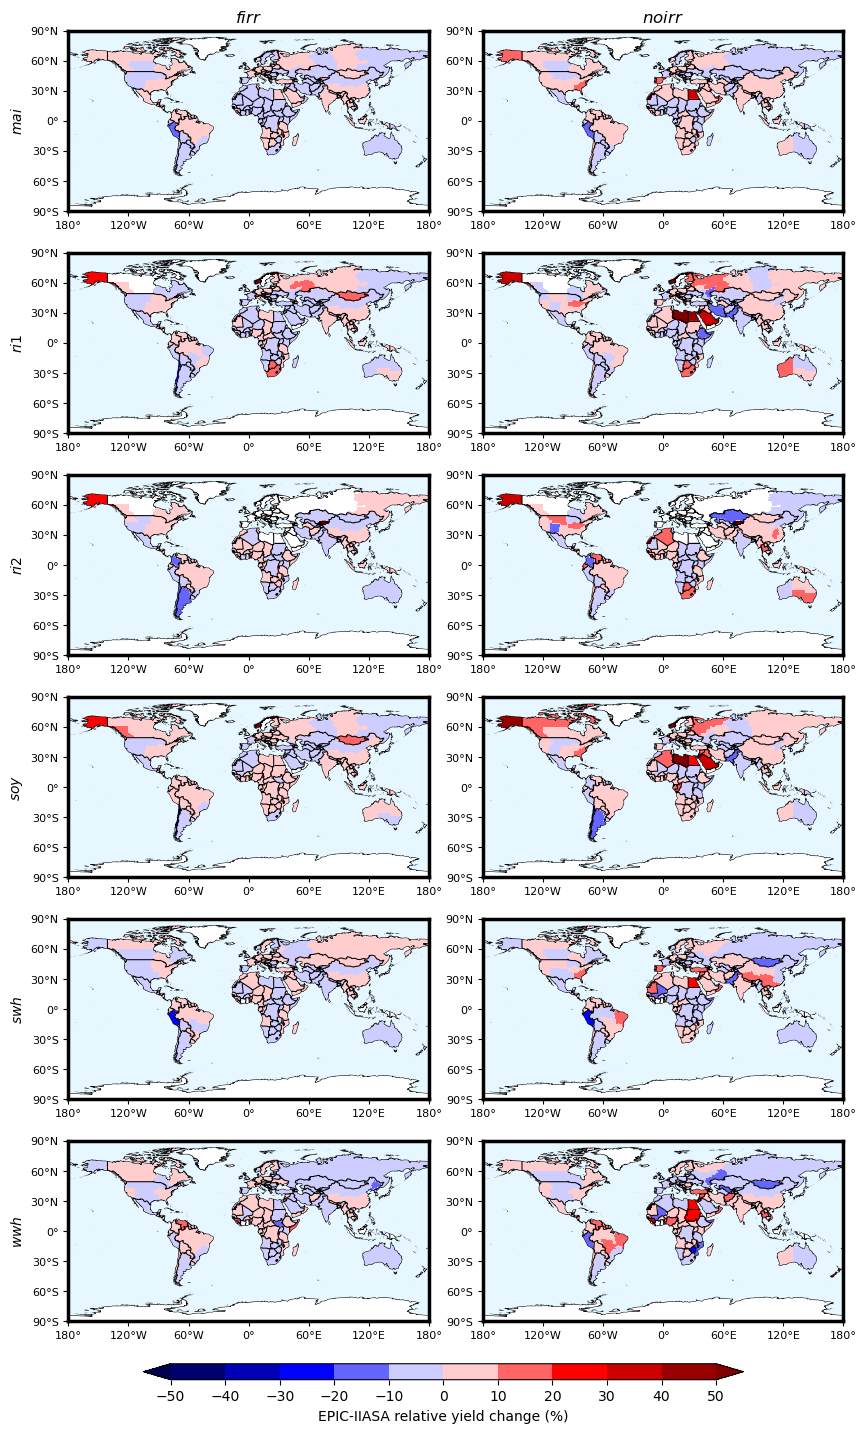

In [ ]:
## 6. individual global map
from core_fct.fct_pre_CROP import create_global_map, remove_timeseries_anomaly, print_values_by_threshold
import datetime
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

current_datetime = datetime.now()
print(f'\033[1;31;46mCurrent date and time: {current_datetime}\033[0m')

reg_p = {'mai': 'Maize', 'ri1': 'Rice', 'ri2': 'Rice', 'soy': 'Soybean', 'swh': 'Wheat', 'wwh': 'Wheat'}
dir = '/h/u145/liuxinrui/Data/ISIMIP3a/'
soc = '2015soc'
MASK_EXTREME = False

impact_models = ['EPIC-IIASA']
YD = Out['YD'].rename({'mod_clim_gcm': 'gcm'})
if MASK_EXTREME: YD = YD*mask
print(YD)

D_YD = xr.DataArray(
    np.nan * np.zeros((len(spcs), 2, len(YD.reg_land), len(impact_models)), dtype=float),
    dims=['spc_crop', 'irr', 'reg_land', 'mod_YD_crop'],
    coords={
        'spc_crop': spcs,
        'irr': ['firr', 'noirr'],
        'reg_land': YD.reg_land,
        'mod_YD_crop': impact_models
    }   
)
for model in impact_models:
    fig, axes = plt.subplots(6, 2, figsize=(10, 16), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0.0)}) # 6 rows for 6 crops, 2 columns for 2 yield types
    for j, irr in enumerate(['firr', 'noirr']):
        fn_yd = os.path.join(dir, 'yield', f'{model.lower()}_yield-{irr}_regional_gs.nc')
        yd = xr.load_dataset(fn_yd)
        yd['YD'] = yd['YD'].where(yd['YD'] > 0)
        yd['YD'] = remove_timeseries_anomaly(yd['YD'], window=anomaly_window, anomaly_ratio=anomaly_ratio)
        yd['YD'] = yd['YD'].where(yd['YD'] > yd_threshold)
        # yd['YD'] = yd['YD'].rolling(year=rolling_window, center=True).mean()
        wgt = yd['weight'].fillna(0)

        for i, spc in enumerate(spcs):
            try:
                # Emulated yield (first column)
                ax = axes[i, j]
                if i == 0: ax.set_title(rf'$\it{{{irr}}}$')
                if j == 0: ax.set_ylabel(rf'$\it{{{spc}}}$')
                yd_out = YD.sel(spc_crop=spc, mod_YD_crop=model, irr=irr, year=slice(1980, 2010), drop=True).mean(['year', 'gcm'])
                yd_in = yd['YD'].sel(spc_crop=spc, year=slice(1980, 2010)).mean(['year'])
                d_yd = (yd_out - yd_in)/yd_in*100
                D_YD.loc[{'spc_crop': spc, 'irr': irr, 'mod_YD_crop': model}] = d_yd
                print(f'{model} {spc} {irr}: {d_yd.mean().values:.2f} ± {d_yd.std().values:.2f} {d_yd.max().values:.2f} {d_yd.min().values:.2f}')
                print_values_by_threshold(d_yd, above=1, below=-1)
                d_yd_global = d_yd.weighted(wgt.sel(spc_crop=spc, drop=True)).mean('reg_land')
                frac = d_yd_global / yd_in.weighted(wgt.sel(spc_crop=spc, drop=True)).mean('reg_land')*100
                # ax.set_xlabel(f'Mean: {d_yd_global.values:.2f} ({frac:.2f}%)')
                # Emulated yield
                # ax, cf = create_global_map(yd_out, levels=np.linspace(0, 10, 11), ax=ax0, cb_on=False, contourf_kwargs={'cmap': 'Reds'})
                # ax0.set_ylabel(rf'$\it{{{spc}}}$')
                # ax0.tick_params(axis='both', which='major', labelsize=8)
                # if i == 0: ax0.set_title(f'Emulated yield')

                # Original yield (second column)
                # ax1 = axes[i, 1]
                # ax, cf = create_global_map(yd_in, levels=np.linspace(0, 10, 11), ax=ax1, cb_on=False, contourf_kwargs={'cmap': 'Reds'})
                # ax1.tick_params(axis='both', which='major', labelsize=8)
                # if i == 0: ax1.set_title(f'Original yield')

                ax, cf = create_global_map(d_yd, levels=np.linspace(-50, 50, 11), ax=ax, cb_on=False, contourf_kwargs={'cmap': 'seismic'})
                ax.tick_params(axis='both', which='major', labelsize=8)
            except KeyError:
                ax0 = axes[i, 0]
                ax.tick_params(labelbottom=False, labelleft=False)
                ax.text(
                    0.5, 0.5, 
                    'No Data', 
                    transform=ax.transAxes,
                    ha='center', 
                    va='center', 
                    color='gray'
                )

    fig.subplots_adjust(bottom=0.08, top=0.9, hspace=0.1, wspace=0.15)
    cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.01])  # [left, bottom, width, height]
    fig.colorbar(cf, cax=cbar_ax, label=rf'{model} relative yield change (%)', orientation='horizontal', extend='both', ticks=np.linspace(-50, 50, 11), extendrect=False)
    plt.show()

>>>  Running create_global_map  <<<


Ploting contour map ...
>>>  Running create_global_map  <<<
Ploting contour map ...
>>>  Running create_global_map  <<<
Ploting contour map ...
>>>  Running create_global_map  <<<
Ploting contour map ...
>>>  Running create_global_map  <<<
Ploting contour map ...
>>>  Running create_global_map  <<<
Ploting contour map ...
>>>  Running create_global_map  <<<
Ploting contour map ...
>>>  Running create_global_map  <<<
Ploting contour map ...
>>>  Running create_global_map  <<<
Ploting contour map ...
>>>  Running create_global_map  <<<
Ploting contour map ...
>>>  Running create_global_map  <<<
Ploting contour map ...
>>>  Running create_global_map  <<<
Ploting contour map ...


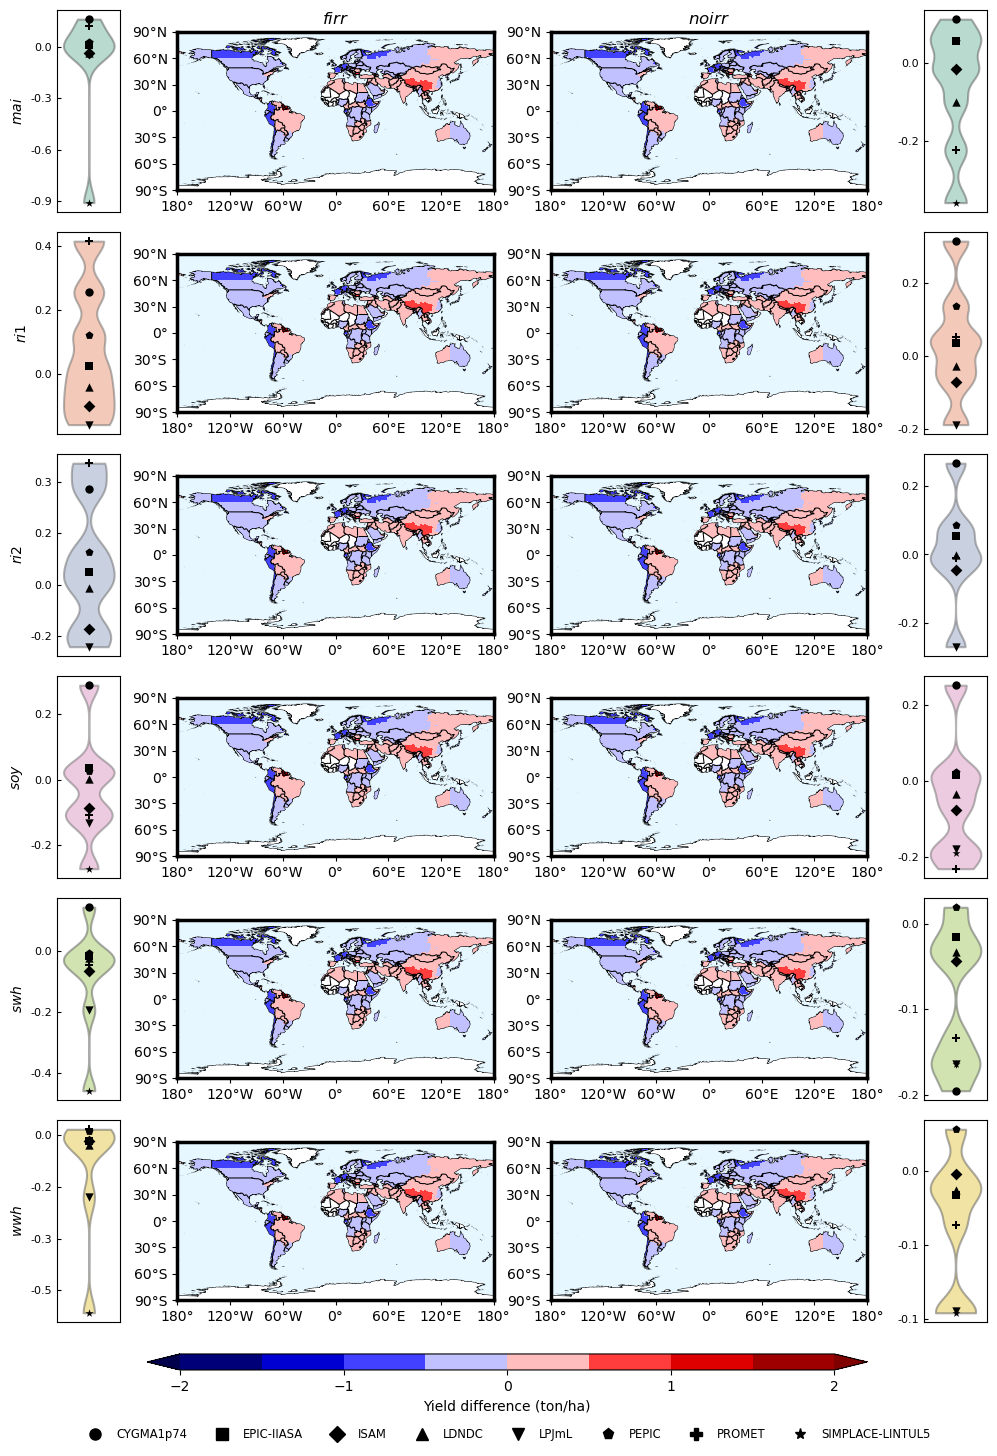

In [ ]:
## 7. violin plot across all GGCMs
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 16))
gs = GridSpec(6, 4, figure=fig, width_ratios=[0.2, 1, 1, 0.2], wspace=0.3, hspace=0.1)
plt.subplots_adjust(bottom=0.08, top=0.9)

fn_yd = os.path.join(dir, 'yield', f'{impact_models[1].lower()}_yield-noirr_regional_gs.nc')
yd = xr.load_dataset(fn_yd)
wgt = yd['weight'].fillna(0)
crop_colors = sns.color_palette('Set2', n_colors=6)
markers = ['o', 's', 'D', '^', 'v', 'p', 'P', '*']

df = D_YD.weighted(wgt).mean('reg_land').rename('Yield difference').to_dataframe()
for i, spc in enumerate(spcs):
    for j, irr in enumerate(['firr', 'noirr']):
        # --- Global Map ---
        map_ax = fig.add_subplot(
            gs[i, j + 1], projection=ccrs.PlateCarree(central_longitude=0.0)
        )
        if i == 0: map_ax.set_title(rf'$\it{{{irr}}}$')

        d_yd_map = D_YD.sel(spc_crop=spc, irr=irr).mean('mod_YD_crop')
        map_ax, cf = create_global_map(d_yd, levels=np.linspace(-2, 2, 9), ax=map_ax, cb_on=False, contourf_kwargs={'cmap': 'seismic'})
        ax.tick_params(axis='both', which='major', labelsize=8)

        # --- Stripplot (Left) ---
        if j == 0:
            violin_ax_left = fig.add_subplot(gs[i, 0])

            d_yd_violin = df[df.index.get_level_values('spc_crop') == spc]
            d_yd_violin = d_yd_violin[d_yd_violin.index.get_level_values('irr') == irr]
            sns.violinplot(data=d_yd_violin, x='spc_crop', y='Yield difference', 
                           ax=violin_ax_left, color=crop_colors[spcs.index(spc)], 
                           linewidth=1.5, bw=0.2, cut=0, inner=None, scale='width', width=0.8, alpha=0.5
            )
            for m, model in enumerate(impact_models):
                df_melted = d_yd_violin[d_yd_violin.index.get_level_values('mod_YD_crop') == model]
                sns.stripplot(data=df_melted, x='spc_crop', y='Yield difference', 
                                ax=violin_ax_left, color='k', marker=markers[m], 
                                size=6, jitter=True
                )
            violin_ax_left.set_xlabel('')
            violin_ax_left.set_ylabel(rf'$\it{{{spc}}}$')
            violin_ax_left.set_xticks([])
            violin_ax_left.tick_params(axis='y', direction='in', which='both', 
                          length=3, labelsize=8)
            violin_ax_left.yaxis.set_ticks_position('left')
            violin_ax_left.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
            violin_ax_left.yaxis.set_major_locator(ticker.MaxNLocator(4))

        # --- Stripplot (Right) ---
        if j == 1:
            violin_ax_right = fig.add_subplot(gs[i, 3])
            d_yd_violin = df[df.index.get_level_values('spc_crop') == spc]
            d_yd_violin = d_yd_violin[d_yd_violin.index.get_level_values('irr') == irr]
            sns.violinplot(data=d_yd_violin, x='spc_crop', y='Yield difference', 
                            ax=violin_ax_right, color=crop_colors[spcs.index(spc)], 
                            linewidth=1.5, bw=0.2, cut=0, inner=None, scale='width', width=0.8, alpha=0.5
            )
            for m, model in enumerate(impact_models):
                df_melted = d_yd_violin[d_yd_violin.index.get_level_values('mod_YD_crop') == model]
                sns.stripplot(data=df_melted, x='spc_crop', y='Yield difference', 
                              ax=violin_ax_right, color='k', marker=markers[m], size=6, jitter=True
                )
            violin_ax_right.set_xlabel('')
            violin_ax_right.set_ylabel('')
            violin_ax_right.set_xticks([])
            violin_ax_right.tick_params(axis='y', direction='in', which='both',
                           length=3, labelsize=8)
            violin_ax_right.yaxis.set_ticks_position('left')
            violin_ax_right.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
            violin_ax_right.yaxis.set_major_locator(ticker.MaxNLocator(3))

# Add a single colorbar
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.01])
fig.colorbar(
    cf,
    cax=cbar_ax,
    label=rf'Yield difference (ton/ha)',
    orientation='horizontal',
    extend='both',
    ticks=np.linspace(-2, 2, 5),
    extendrect=False,
)
legend_elements = [
    mlines.Line2D([], [], color='black', marker=marker, linestyle='None', markersize=8, label=label)
    for marker, label in zip(markers[:len(impact_models)], impact_models)
]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.02),
           ncol=len(impact_models), fontsize='small', frameon=False)
plt.show()
